# Soft System: identification, visualization and analysis


In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
run '__init__.py'

# Analysis of 311 Data

**N.B. ArcGIS Map:** https://arcg.is/8ifnL

This analysis leverages 3 sets of data from NYC Open Data sources:
1. **[311 Service Requests from 2010 to Present](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9):** provides 311 reporting as far back as 2010, and is updated on an automated daily basis. Each record in this dataset corresponds to a 311 service request.
2. **[NYC Community Boards](https://data.cityofnewyork.us/City-Government/NYC-Community-Boards/ruf7-3wgc) + [Community Districts](https://data.cityofnewyork.us/City-Government/Community-Districts/yfnk-k7r4):** (for the ArcGIS map) provides the locations of community boards described as nodes above, as well as neighborhood boundaries.
3. **[Agency Service Center](https://data.cityofnewyork.us/Social-Services/Agency-Service-Center/nn5y-wmuj)**: (for the ArcGIS map) provides locations of agency service centers described as nodes above.
4. **[311 Service Level Agreements](https://data.cityofnewyork.us/City-Government/311-Service-Level-Agreements/cs9t-e3x8):** Provides the time commitments that City Agencies have made to respond to 311 Service Requests that are assigned to them.

Major takeaways include:
1. **Periodicity:** several agencies face 311 calls in seasonal waves. For example, housing preservation and development (HPD) faces most calls in winter months when heat/hot water are front of mind. The NYPD faces most calls in summer months, when most residents are out and about. There are also so peak events corresponding to the ending of COVID-19 lockdowns.
2. **TTR varies by geography:** Deeper parts of Brooklyn and Staten Island are more poorly serviced when measured by time to resolution. This can stand in contrast to where the most 311 submissions are actually filed.
3. **SLA breaches:** Most agencies outside of the Department for Consumer Affairs and the NYPD are struggling to meet SLA agreements.

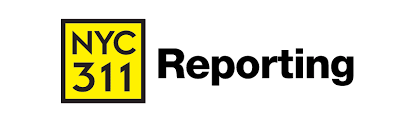

In [7]:
b64dat = "iVBORw0KGgoAAAANSUhEUgAAAZ0AAAB6CAMAAABTN34eAAABEVBMVEX/////8QAAAAAjHyD/9gAOBgn/8wD8/PwAAB7u7e7V1NQSDA4fGx//9wCcmpsAACC1qx87OCrl2SXMwjZzc3Pd3d0VER8ODg4PCh9+eC5DQ0OWjjSJiYmTk5MLBR6mnjwaFR9lYCoYGBhpaWlLSDnX19c/Oyh3cTfm5uYkJCTLy8sAAChwbEenp6dcXFy/v78zMzP56xAkITUAACO2trYwMDC4rzqioqJ7e3s7OztMTEwCACzSxyM7NzBOSjHFuzmNhjkODDQWFDQFAzcmJDR1byzx5R5XUzWupjUtKi4YFixYVULv4hSdlTmbkypmYjd+eDZnY0ickyCwpyKTjERRSx59dhlwaiMqKDp5ciEzLyfdDNq2AAAMZUlEQVR4nO2d7WLaOBaGMfbIJmvjDhSHrxAHkobAAKFAE1KmZLrThGbTpNvOdrdz/xeykizJkjEpoSYwnfP+aGNJlo0eH+noSIZUCgQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAPK7MGmZv+UD+KzPQ/Elc6u+lP9aPITOuJ6yegk5CAzjaL0vGs5GQDneRE6HiVfHL60wY6iYnQcZ85hiRkqHrc8c9AJzkFdAwtISEEdBIU0NlmAZ1tFtDZZsl0ULSlscR/0WT2N3ULkJQJdBKURAflVAp9IsT+iyQzFP3cq/39V5M+MhDQWYMkOs5lxZHwGPu/vXz5q2P88vbly98mvO8zJv98+fLtMQFh5Eq/u1atZrmv302Z4QGdRCXTqQwqTkjH2a/p/gsHXbVt3X/T561/6Ot2+wppxu1x27NZ7MazrnMG0ElcCp2ijIfQsV84mjNzdd2aBRnOzMLl8YEzeV8kXGwvQOS3pw7QSVoqHd0N8XA6mvPG1/WbHDEedPUag7h2cAdXJFBqbvm49K/XJLhmt18ZQCdhRejobsmJ0kG5Ae67DojLYBx4ut7G3sPtewzEH9z1HaLpKT7Tusa9H9BJVFE6uvvRidDRnA+4bxvgnsvIk05uH/drx5iS/+tt4EUgo39ste8C9xvoJKg5OsR6kEoncAVe9FEfN739s4PQpIa7sl9vxSQW9e/z9Cygk6jm6XA8IZ1glKlVnAp2CQYTpDkfPfKHFGFA4FGvQ1E6tkfwkMmlRAdnYWPRZ76tFy8dDOJP7GQfoEhsAegkrggd+/CS2EcJt7xMB/Vf4L7NJ90ZGfonBOHnuOAc0ElUc3ScjwTPVw3JdLA/EPR6tbxBDrAlDXIxpgN0ktU8HcTwKHQ0o0TwFKlDZzwb8AkQ0FmrYugEeEpIoYOuXhB/7QpRQ3LprAforFvzdHALl1ziGvzhSXToFMf/hR6iyQ3On8C4s3bF0CF48MDineqL6Fzptu6VHKCzbsXRwW18WaNOQDwdzbnGHtz7nLomB3SSVywd3Mhk4rmQjvEMd33esbSYauRvYQUhecXT0ZBRcRfTQYiErQeXfTb0ICfvHtIFnhg6w2pUZ4WNvKTQbDyn2sS1V9QCOhjPnbuQDjaVGxLyuc8ZdJ+iVhnYvjuLj4I+T8/rJLsBPgV28ae/8spaRAfbA8aziI7mzAZkyW1wP5tOZ19vyFzIOo5fQYijk07vtp7gw1WDa1WDox+JDsWzkI7m3A3I8ptfsyzXI0OU9XHBCkI8nXS6t/4PtxdcaS84+qHoYDyf3IV0NGd6UwtfCvFez9CCFYRFdHYza/9wPxSdS8uyxtIsBuP5PaRzgHP/LeUa/bu3Vs3zfa9mvT7OsYW45enwDmeNitA5LRNdrP2yyUnZzzadTvPKJMYIA9FognMnaq42/fTu+vrrp1f9B/azcTrVPapzQae8ds9ApfMXlLIXlOzr1BQhGcZ8ruEghP8J0x+g0+QJDd61FaRSmcLRop4uU4jzwM3MUeFbfeNydOLqb+40t+HV5PXvo+Z0Qha7LOWIJ/QaJzht96Tb402SyVJD66RSnTHOqo+zCglz2K2T5NH5jkjqBLaJa2g1Rif1YXYv2w2u08WVnZmpTFCAsGru8eozeyNa/5lUf6txgs+qNwqpQlDuKfzLWG2CTle1nd44HItOhkEaG8HHvCxurGFYZeckPOOC1WKyWjLMNvfUQQ77IEfsT1y4xasfigIjztlsiLRWb8Nd4yboXDASweMaacZzmlgI7KssuxQdfssRPyPAZpYZHcZzb1cphC8m+WyMzkVPKqEHXa8pkT/J/v3omCyhS4/O0xFRPIXdaDIW62C60XSKh9NhDRq1nVg69bpcJAjxlOWk3b8cnbi9HsvQ4V4Bf7iD6egZOxg1unUpPZbOmI5K1fkMMoBxOryWCJ16HJ25IrjTjMvZDjrR93WDl3ZVEEY/igc5/WXodBuBeM/RIJlNdkAG/SYrWU/JdBqdVpW3ODES3sb1am/IRwgyhTGVhx6XbRaazC7PmwXilsXSGXXFU0Ftkx9cdHpnosatoINyH/bn9EGZ4xj9T3cRQzO0z5fLeNQRlTNSZlYpOpTonJH0JiNaTol+bUQ7Sv6ktxQ6jc7O8Jw09cJYgaBTxXeR4ZA7YQbtXoV/sBV0jLxVi8o6lN+sMibXVkVZE0VG7t4tGY+lU69SOBnW1KwoO+yGdBpBBnOtdpu8CI/SNUQxQUeKr36TTjD0mXXxJLAzTk35fraFjhv9UhX7/W1oF8Ztqe0XP8ixHqNfafve4+mMgyZkrV5NmVQZ1sKmoMNa2hzxw6HSfLyZsb8s6EiTk2/SYWXL/Da4ZfIgU3Wr6dg3ecHC0GZ2UdeLku0g7dmI7EB4PB32idmnPzllYg9xgdOp8zkia7UOb/BzXjurLaTTkC79LTq8emaB2GljkyY+t+psFZ2B6NHoqoA+2A/hTN64ZM1AokM6NZK0Eh3aAjH+V5DF6JzwSs75M60u2aRSbERqCTrSpHV1Otz+hltEB91Oxdfd7BM8ta9hiLoy8CmwsGczXrWDpOXodHpEQwEE+8fm3NSFFV1Ep8EbUtARzcnpyFGXH4pO6FE7/UNsFN51OJNxfgmsSbId54+i/gg6Yr7DGbRipqK8NaJ0xOifjdDZ5ZUnQ4eFMbKxFTy94mejzjvyOsJJ6BFozrGv2/YcHXv5nk3ECnhsqxqOupmmIuEV7HKkZd5MZ6Ih2e0HyiREh90QXwMabSMdZ39A3hWRd3s6x551eG3LPRumUzy9tx9Nh4/kXTHqzq/DRXw23rA9/hdfWGWkL8yE6PAJVBDTE1GhRJp6BcXRMSZkz4D7WZ7YOPftu/6Br9rOoNQveY+nMxZ0WC+3yxcOWnRs6oV0ggmJ8B52xGT+TKlqL/UQnfldHwvpiG73vLXTEsHqbaKDrn4n71D/J59zwnTjj4mjUTqhV7Cfd4xV6LAUEjYL24VoRyARsQLasjwYd5oKn27im4nJfOZBOiQtsxydeA9zi+gg45o6APbAe5N35ACnptKh7yOuQodPyDOCR7rbymSavOF7cpyt3miM+N/UYOrsYBzGTcn14uiIkGZdH8XGqOfpCOPZUjpOxfU8n4z2tu9WpCAoo6NEclaiwwaLOhnyhYNdr3MgpDeLjVEHC0KFuXTa/cXRKSjnLkUnJS/57Da2jQ7KH3758uW/p8H0xlUiA1HbWZEObwC6cj035Tkhg1AsHRZbi4b/g4WFODpmuOq6NJ1UL7x072zr6NySb4hAV5MDGtYZ5I0Ine+3Hd6dBa0diRd0AwNhHnVWyuFro6mjkXzC88CliKMjgVyeTiqzF1TVOOJO21nCjb60YsYd9g0RiL5n7f/sfCcdPnIXpGsyEMHhjmQ+Zb6vgD3AhRZfDhpLe0fNrFhevuA0wkCprNYFLxi3ryDN6LAbECE6s1noFUi/y+gMUxvS4rVRRP0x3RXrOyv2bGTpq1BQdiUVIknNTqNbLncbe0c8hdM5SmWG3Ytx93lP3cCUaZ13u/gEqdb5ywR1t4adzrCH001WgnxqtTC7xSbJCObD7GQWy9hJbUgPrFyjHH3RQGSuaDvL3ojSrCEdmpfAB11SiqHzhZ+NbW17iE7/XqGxXjqqVDpPKNYTXhTIctNzZTzagB6ioxEa4fuhK/ZsK2ljdIRDXe6KIavw7dPWpAdthwSqa5//VraTEkyENrgNO0IHSbNPY9Im4870acYdVZujY0bxrP9ViQduJq0O/LPw24z71+SLcQb97/TZVhKfm2zCWzqT2Yw3toeaSKFjXF1b91fBF60Z/WMy3ymWvne+s5Iy1XOq5reLrkGtbOO0Xq+Pn3ee3nYVyXScyXtP99t3ecdxtOmIrHza7hXaBB0QlUTHmLbp1+MWXfd/Ny7dz0G/PjdC50l6NhCV/O5b/8DiO6XYfwNl85oGtvPEUn8H4a7tSbvZirLlgO1sQJE9ObnjtuX5tm37ntUu5dQ1U+2e/LCbajvvSNI7oLMeRec76Hb29eDw8PD+y+w2+pqoln+Fpb7ZS5PyD+1yB62u+fUdw9DIr4TMvcKrsf1u0TdGlCSgk6jiIjnRX9x5hIBOooLfrtpmAZ1tFtDZZrFfg0VJCX4NNkkROsVPueQEv6ScoOivkBfd5AS/Qp6gKJ2EBXSSEtDZZpnpnxJXGugkpZ01aDMrmiAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCATalP4PSLKlElIeUToAAAAASUVORK5CYII="
display.Image(b64decode(b64dat))

## SQL Data Mining

**311 Service Requests from 2010 to Present**

Given the timeframe and nature of this data, you may not be surprised to find that there's 41 columns with 31.4M records of service requests (and counting). Because this dataset will be easily >10GB, it would be computationally infeasible to work with all of the data without chunking / filtering. To avoid abusing my poor little laptop, we'll work directly with the Socrata API and run SQL queries against the database to understand some high level information about the dataset first.

**Let's count the number of records grouped by:**
1. Complaint Type: This is the fist level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.
2. Status: Status of SR submitted (Assigned, Cancelled, Closed, Pending, +)
3. Agency
4. Borough
5. Medium: Indicates how the SR was submitted to 311.  i.e. By Phone, Online, Mobile, Other or Unknown.
     - Phone - submitted by a 311 call center agent on behalf of a customer.
     - Online - submitted through the 311 mobile app.
     - Other - submitted by another city agency or source.
     - Unknown - unable to determine the source channel of the SR.  
6. Year

In [11]:
APP_TOKEN = os.getenv("APP_TOKEN")
client = Socrata("data.cityofnewyork.us", APP_TOKEN, timeout=3600)

In [4]:
df_dict = {}
for field in tqdm(['complaint_type', 'status', 'agency_name', 'borough', 'open_data_channel_type']):
    query = f"""
        SELECT
            {field}, COUNT(*) as frequency, COUNT(*) / SUM(COUNT(*)) over () AS fraction
        GROUP BY {field}
        ORDER BY frequency DESC
        LIMIT 10
    """
    df_dict[field] = pd.DataFrame.from_records(client.get("erm2-nwe9", query=query))

  0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
query = f"""
    SELECT
        DATE_EXTRACT_Y(created_date) AS year, COUNT(*) as frequency, COUNT(*) / SUM(COUNT(*)) over () AS fraction
    GROUP BY DATE_EXTRACT_Y(created_date)
    ORDER BY DATE_EXTRACT_Y(created_date) DESC
"""
df_dict['year'] = pd.DataFrame.from_records(client.get("erm2-nwe9", query=query))

## Aggregate EDA

**How has the medium through which users interact with the 311 system changed over time?**

In [6]:
%%time
query = f"""
    SELECT
        DATE_TRUNC_YM(created_date) AS year_month, open_data_channel_type, COUNT(*) as volume
    GROUP BY DATE_TRUNC_YM(created_date), open_data_channel_type
    ORDER BY DATE_TRUNC_YM(created_date), open_data_channel_type
    LIMIT 2653295
"""
df_dict['2.2.1'] = pd.DataFrame.from_records(client.get("erm2-nwe9", query=query))

CPU times: user 25 ms, sys: 6.06 ms, total: 31.1 ms
Wall time: 45.3 s


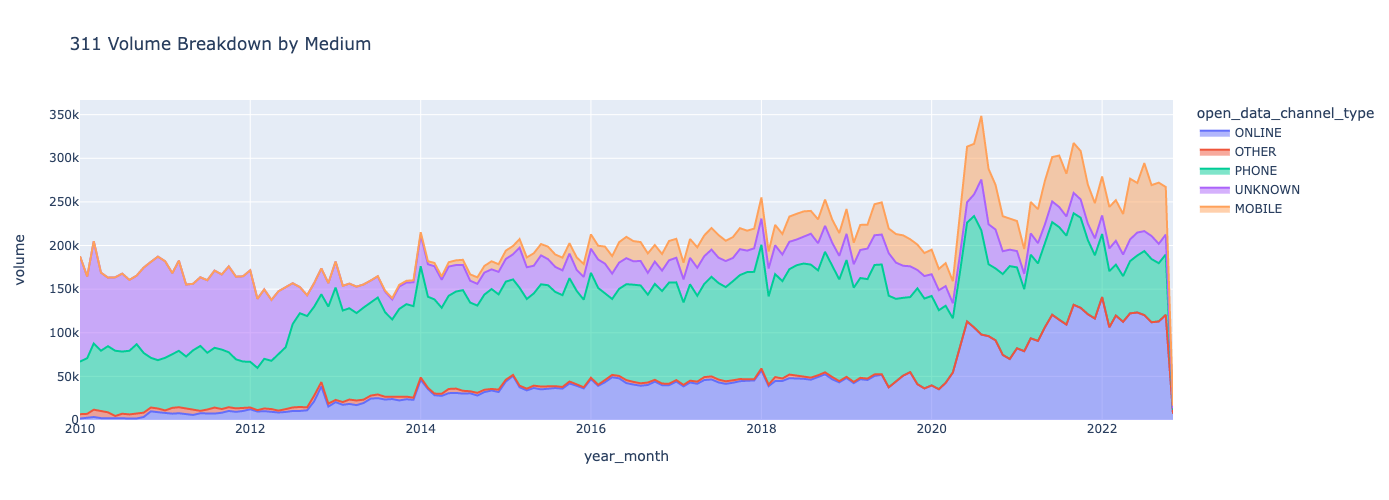

In [7]:
df_dict['2.2.1'] = df_dict['2.2.1'].astype({'year_month':'datetime64[ns]', 'volume':int})
px.area(df_dict['2.2.1'], x='year_month', y='volume', color='open_data_channel_type',
        title='311 Volume Breakdown by Medium', height=500)

**How has the volume of requests fielded by agencies changed over time?**

In [8]:
%%time
query = f"""
    SELECT
        DATE_TRUNC_YM(created_date) AS year_month, agency, COUNT(*) as volume
    GROUP BY DATE_TRUNC_YM(created_date), agency
    ORDER BY DATE_TRUNC_YM(created_date), agency
    LIMIT 2653295
"""
df_dict['2.2.2'] = pd.DataFrame.from_records(client.get("erm2-nwe9", query=query))

CPU times: user 135 ms, sys: 32.6 ms, total: 168 ms
Wall time: 1min 31s


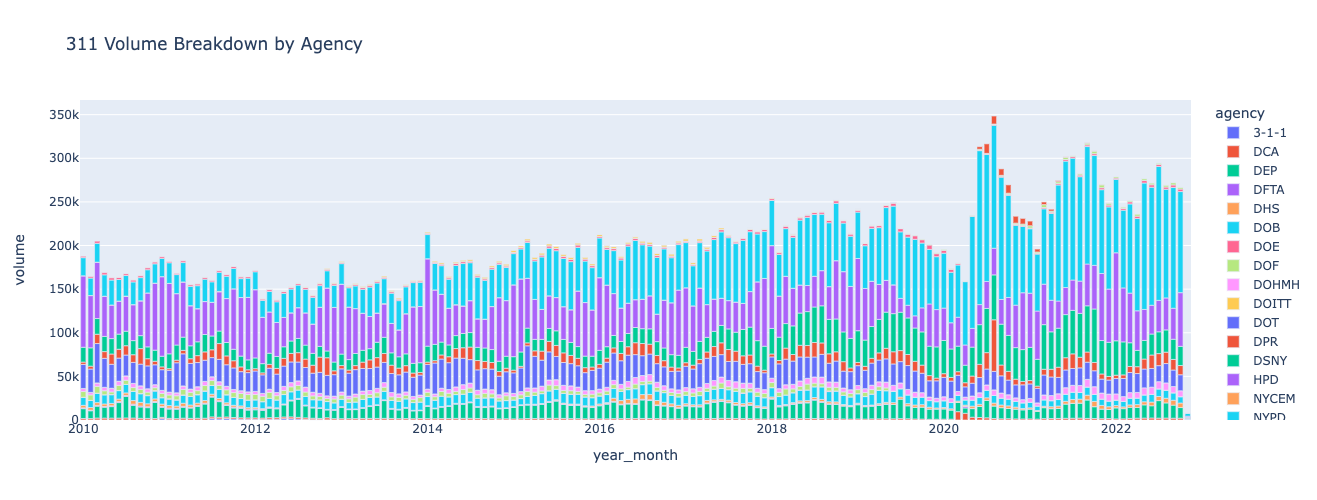

In [9]:
df_dict['2.2.2'] = df_dict['2.2.2'].astype({'year_month':'datetime64[ns]', 'volume':int})
px.bar(df_dict['2.2.2'], x='year_month', y='volume', color='agency',
        title='311 Volume Breakdown by Agency', height=500)

**How have the complaint types changed over time? Are there any spikes in volume for specific complaints?**

In [10]:
%%time
query = f"""
    SELECT
        DATE_TRUNC_YM(created_date) AS year_month, complaint_type, COUNT(*) AS volume
    GROUP BY DATE_TRUNC_YM(created_date), complaint_type
    HAVING complaint_type in ({','.join([f"'{i}'" for i in df_dict['complaint_type'].complaint_type.values])})
    ORDER BY DATE_TRUNC_YM(created_Date), complaint_type
    LIMIT 2653295
"""
df_dict['2.2.3'] = pd.DataFrame.from_records(client.get("erm2-nwe9", query=query))

CPU times: user 21.1 ms, sys: 2.89 ms, total: 24 ms
Wall time: 20.5 s


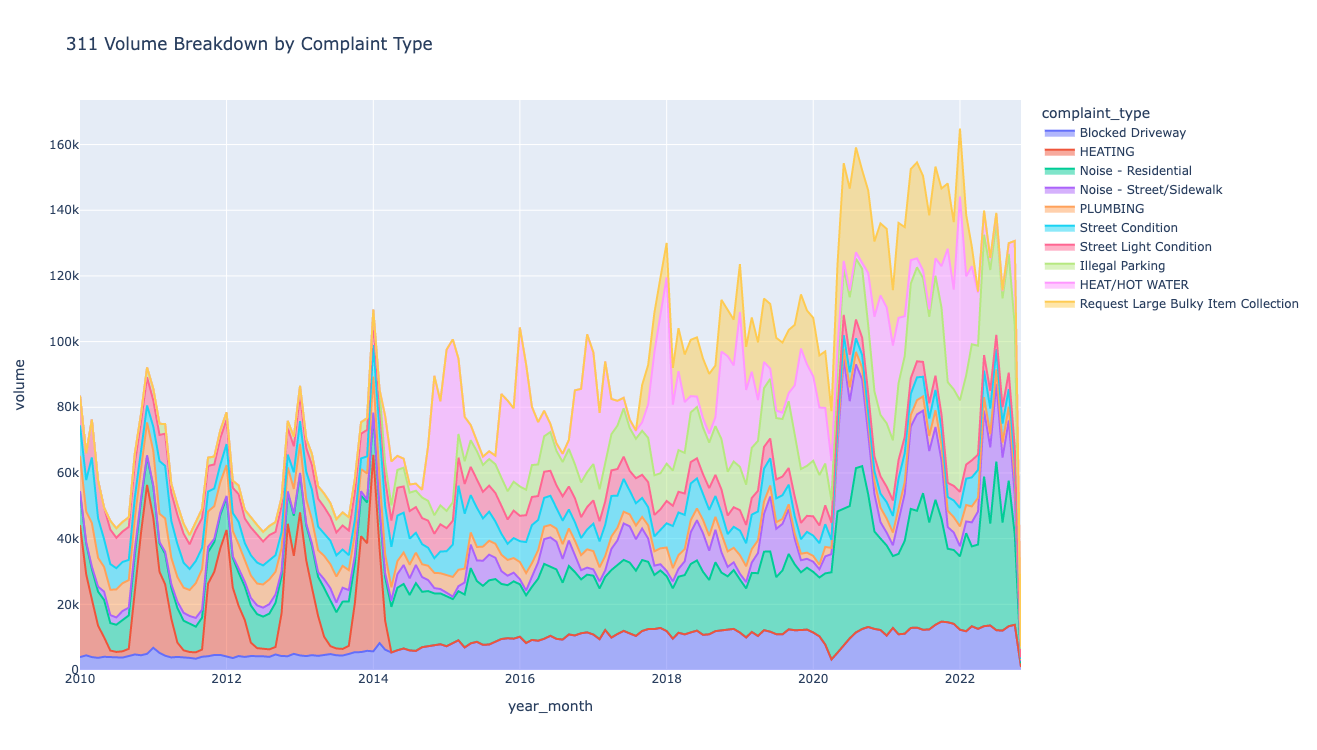

In [11]:
df_dict['2.2.3'] = df_dict['2.2.3'].astype({'year_month':'datetime64[ns]', 'volume':int})
px.area(df_dict['2.2.3'], x='year_month', y='volume', color='complaint_type',
        title='311 Volume Breakdown by Complaint Type', height=750)

## Ingestion + Cleaning

Due to limitations of SoQL and suspicions I have on the data quality of older reporting, for the 2nd part of this analysis, we'll confine ourselves to working with year-to-date data

In [12]:
%%time
query = f"""
    SELECT
        unique_key, created_date, due_date, closed_date, status, resolution_description,
        agency, agency_name, community_board, open_data_channel_type, complaint_type, descriptor,
        location_type, incident_zip, incident_address, city, borough,
        latitude, longitude
    WHERE DATE_EXTRACT_Y(created_date) = "2022"
    ORDER BY created_date
    LIMIT 2653295
"""
reports = pd.DataFrame.from_records(client.get("erm2-nwe9", query=query))

CPU times: user 33.3 s, sys: 12.1 s, total: 45.5 s
Wall time: 3min 7s


In [13]:
# These fields are all encoded as strings - let's align them to expected datatypes and attempt to minimize memory usage
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653295 entries, 0 to 2653294
Data columns (total 19 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   unique_key              object
 1   created_date            object
 2   closed_date             object
 3   status                  object
 4   resolution_description  object
 5   agency                  object
 6   agency_name             object
 7   community_board         object
 8   open_data_channel_type  object
 9   complaint_type          object
 10  descriptor              object
 11  incident_zip            object
 12  incident_address        object
 13  city                    object
 14  borough                 object
 15  latitude                object
 16  longitude               object
 17  location_type           object
 18  due_date                object
dtypes: object(19)
memory usage: 384.6+ MB


In [14]:
reports = reports.astype({'unique_key':'int32', 'latitude':float, 'longitude':float})

for col in reports.columns[reports.columns.str.contains('date')]:
    reports[col] = pd.to_datetime(reports[col])

In [15]:
# Save Year-To-Date data for easier access down the road
# reports.to_parquet("311_reports/311_reports_ytd.parquet", index=False)

### GeoPandas

At this point, we're going to output to a shapefile as the compression steps below are incompatible with that file format:

In [16]:
# %%time
# reports = gpd.GeoDataFrame(reports, geometry=gpd.points_from_xy(reports.longitude, reports.latitude, crs=4326))

# # So why did we use this EPSG code?
# reports.geometry.crs

In [17]:
# reports[['geometry', 'unique_key', 'status', 'agency_name', 'community_board', 'open_data_channel_type',
#          'complaint_type', 'city', 'borough', 'location_type']].to_file("311_shapefile/311_reports_ytd.shp")

### Compression
Most of these fields are actually categorical as opposed to free-text

In [18]:
# reports = pd.read_parquet("311_reports/311_reports_ytd.parquet")

In [19]:
for col in tqdm(['status', 'agency', 'agency_name', 'community_board', 'open_data_channel_type', #'complaint_type',
                 'city', 'borough', 'incident_zip', 'location_type']):
    reports[col] = pd.Categorical(reports[col])

  0%|          | 0/9 [00:00<?, ?it/s]

In [20]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653295 entries, 0 to 2653294
Data columns (total 19 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_key              int32         
 1   created_date            datetime64[ns]
 2   closed_date             datetime64[ns]
 3   status                  category      
 4   resolution_description  object        
 5   agency                  category      
 6   agency_name             category      
 7   community_board         category      
 8   open_data_channel_type  category      
 9   complaint_type          object        
 10  descriptor              object        
 11  incident_zip            category      
 12  incident_address        object        
 13  city                    category      
 14  borough                 category      
 15  latitude                float64       
 16  longitude               float64       
 17  location_type           category      
 18  du

Great! We cut memory usage by ~40%

## Granular EDA

**What are people complaining about?**

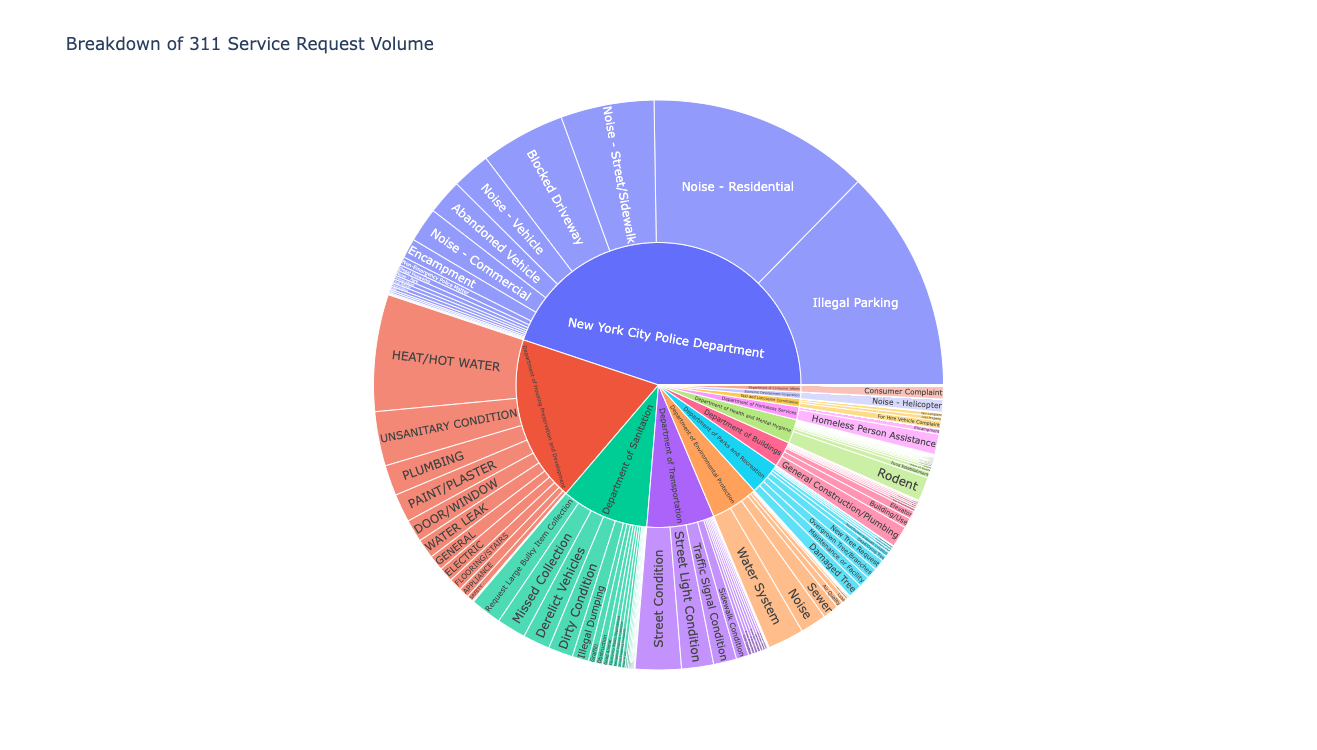

In [21]:
df = reports.groupby(['agency_name', 'complaint_type']).unique_key.nunique().reset_index()
fig = px.sunburst(df, path=['agency_name', 'complaint_type'], values='unique_key', height=750,
                  title=f'Breakdown of 311 Service Request Volume',
                  labels={'ride_id':'Volume'})
fig.show()

**Where are complaints being filed from?**

See ArcGIS hotspots

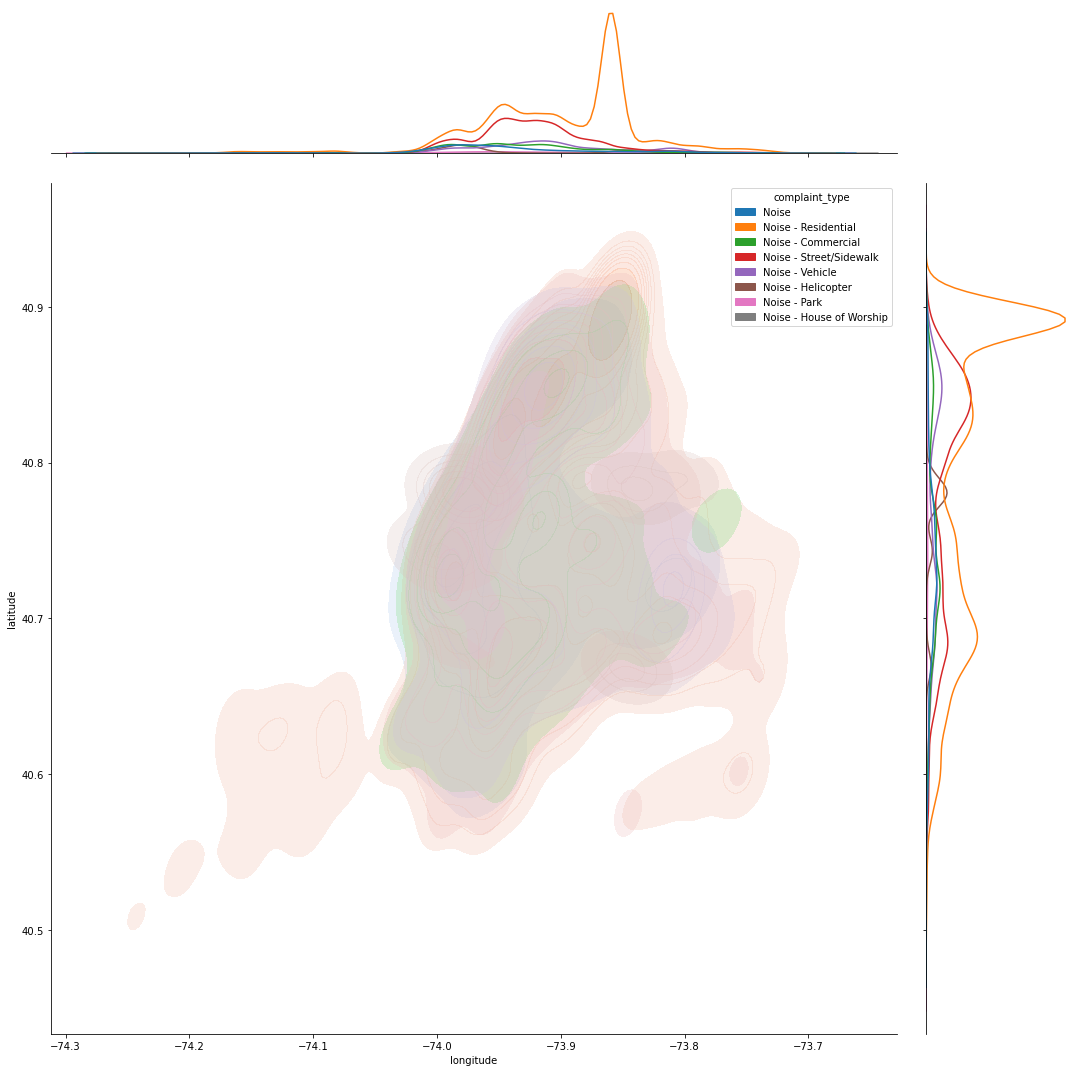

In [22]:
sns.jointplot(
    data=reports.loc[reports.complaint_type.str.contains("Noise")].sample(100000),
    x="longitude", y="latitude", hue="complaint_type", kind='kde', height=15, shade=True, alpha=.25
)

**When are people complaining?**

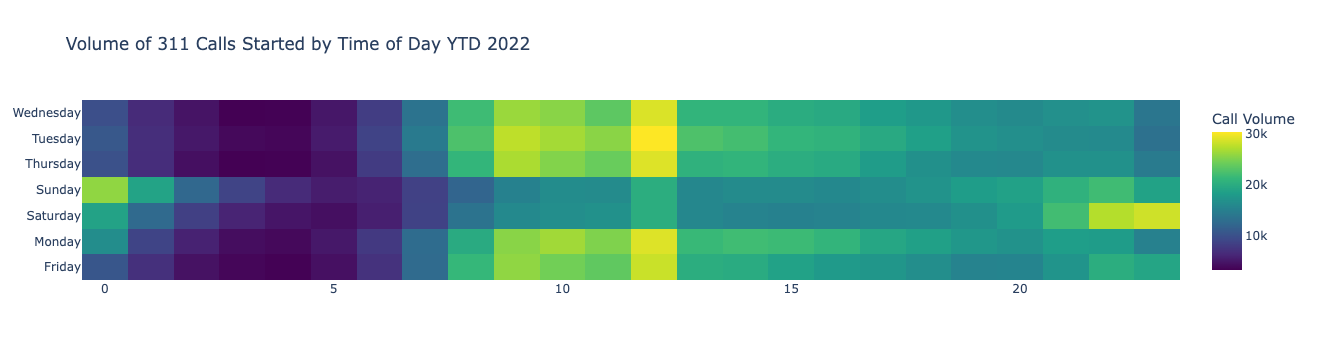

In [23]:
df = reports.groupby([reports.created_date.dt.day_name(), reports.created_date.dt.hour])\
            .unique_key.nunique().unstack()#.reset_index(level=0)
df.index = pd.Categorical(df.index, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

fig = px.imshow(df,
                title=f'Volume of 311 Calls Started by Time of Day YTD 2022',
                color_continuous_scale='viridis', labels={'y':'Weekday', 'created_date':'Hour', 'color':'Call Volume'})
fig.update_layout(xaxis=None, yaxis=None)
fig.show()

**When, if any, were there spikes in time to resolution for 311 service requests?**

In [50]:
# TTR = time to resolve
# TD = timedelta = time to resolve when closed date exists, time from open to now otherwise
reports['td'] = (reports.closed_date.fillna(pd.Timestamp.now()) - reports.created_date).dt.total_seconds() / 3600

resolved = (reports.status=="Closed") & (reports.closed_date.notna()) & (reports.td >= 0)

In [25]:
reports[resolved].td.describe() 

count    2.470738e+06
mean     1.312707e+02
std      3.978180e+02
min      0.000000e+00
25%      7.363889e-01
50%      3.860278e+00
75%      7.605000e+01
max      7.288923e+03
Name: td, dtype: float64

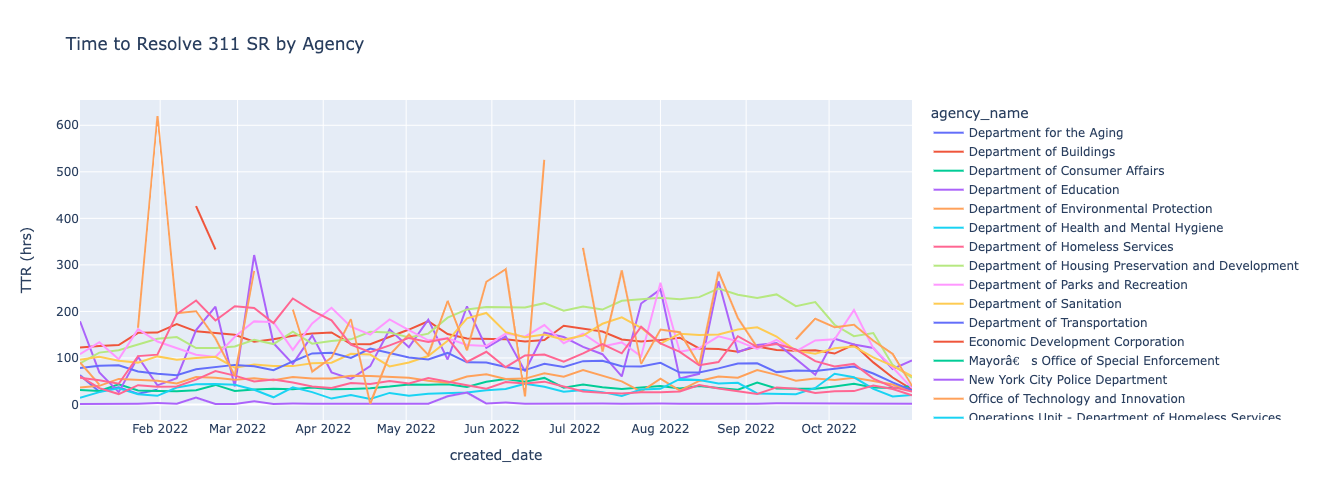

In [26]:
df = (reports[resolved&(reports.td <= reports.td.quantile(.90))].groupby([pd.Grouper(key='created_date', freq='W-MON'), 'agency_name'])\
                                                                .agg({'td':'mean', 'unique_key':'count'})).reset_index()
px.line(df, x='created_date', y='td', color='agency_name', hover_data=['unique_key'],
        labels={'td':'TTR (hrs)', 'unique_key':"Volume"},
        title='Time to Resolve 311 SR by Agency', height=500)

**How long does it take for agencies to resolve 311 service requests by neighborhood?**

In [45]:
reports = reports.merge(reports[resolved].groupby('community_board').td.median().rename('ttr'), how='left', on='community_board')

/var/folders/42/qlm4zcmj6jb69bb7c3htqswc0000gn/T/ipykernel_97356/153907486.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [61]:
reports[resolved].groupby('borough').td.median()

borough
BRONX             8.456389
BROOKLYN         20.088333
MANHATTAN        13.875556
QUEENS            6.250278
STATEN ISLAND    24.956528
Unspecified      38.550000
Name: td, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

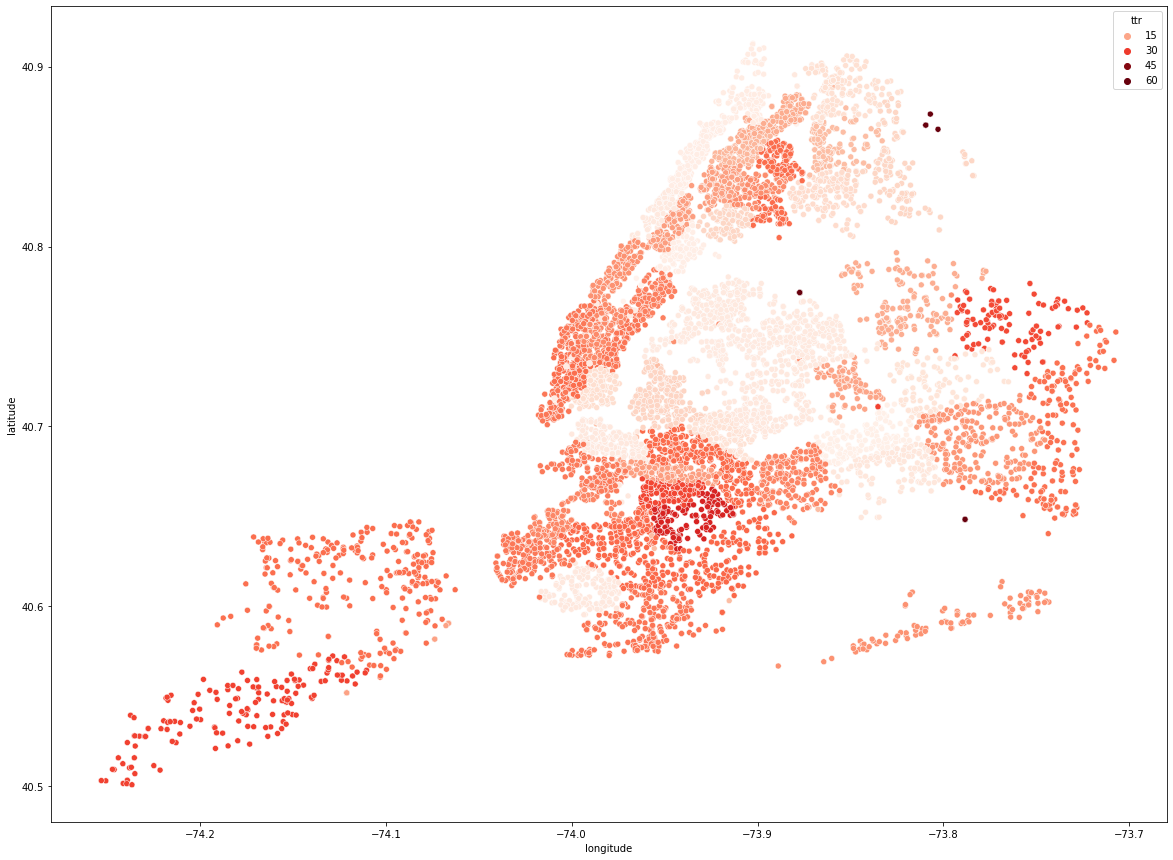

In [60]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=reports[resolved].sample(10000),
                x='longitude', y='latitude', hue='ttr', hue_norm=(0,48), palette='Reds')

**Which agencies are not meeting their SLAs?**

In [28]:
sla = pd.read_csv("311_reports/311_Service_Level_Agreements.csv")
sla['sla'] = pd.to_timedelta(sla[sla.SLA.str.contains("day|hour")].SLA).dt.total_seconds() / 3600

{'Mayor’s Office of Special Enforcement', 'Human Resources Administration', 'Department of Records and Information Services', 'Department of Finance', "Administration for Children's Services", 'Department of Information Technology and Telecommunications'}
{'Office of Technology and Innovation', 'Operations Unit - Department of Homeless Services', 'Mayorâ\x80\x99s Office of Special Enforcement'}


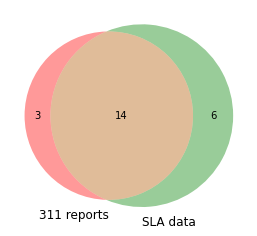

In [29]:
venn2([set(reports.agency_name), set(sla.Agency)], set_labels=['311 reports', 'SLA data'])
print(set(sla.Agency) - set(reports.agency_name))
print(set(reports.agency_name) - set(sla.Agency))

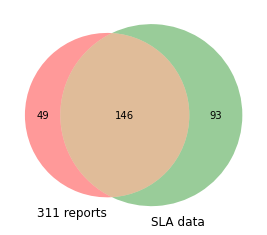

In [30]:
venn2([set(reports[reports.agency_name.isin(sla.Agency)].complaint_type),
       set(sla[sla.Agency.isin(reports.agency_name)].Problem)], 
      set_labels=['311 reports', 'SLA data'])

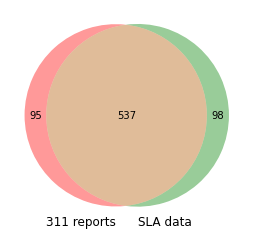

In [31]:
venn2([set(reports[(reports.agency_name.isin(sla.Agency)) & (reports.complaint_type.isin(sla.Problem))].descriptor),
       set(sla[(sla.Agency.isin(reports.agency_name)) & (sla.Problem.isin(reports.complaint_type))].Problem_Details)],
       set_labels=['311 reports', 'SLA data'])

In [32]:
sla = sla.dropna(subset=['Agency', 'Problem', 'Problem_Details']).set_index(['Agency', 'Problem', 'Problem_Details']).sla.dropna()
reports = reports.merge(sla, how='left', left_on=['agency_name', 'complaint_type', 'descriptor'], right_index=True)
reports['breached'] = reports.td > reports.sla

In [33]:
reports[(reports.sla.notna())&(reports.td>0)].groupby('agency_name').breached.apply(lambda g: g.sum() / g.count())

agency_name
Department of Consumer Affairs             0.032507
Department of Education                    0.550814
Department of Health and Mental Hygiene    0.657147
Department of Homeless Services            0.712519
Department of Parks and Recreation         0.672603
Department of Sanitation                   0.512637
Department of Transportation               0.305021
Economic Development Corporation           0.979979
New York City Police Department            0.044170
Taxi and Limousine Commission              0.588926
Name: breached, dtype: float64

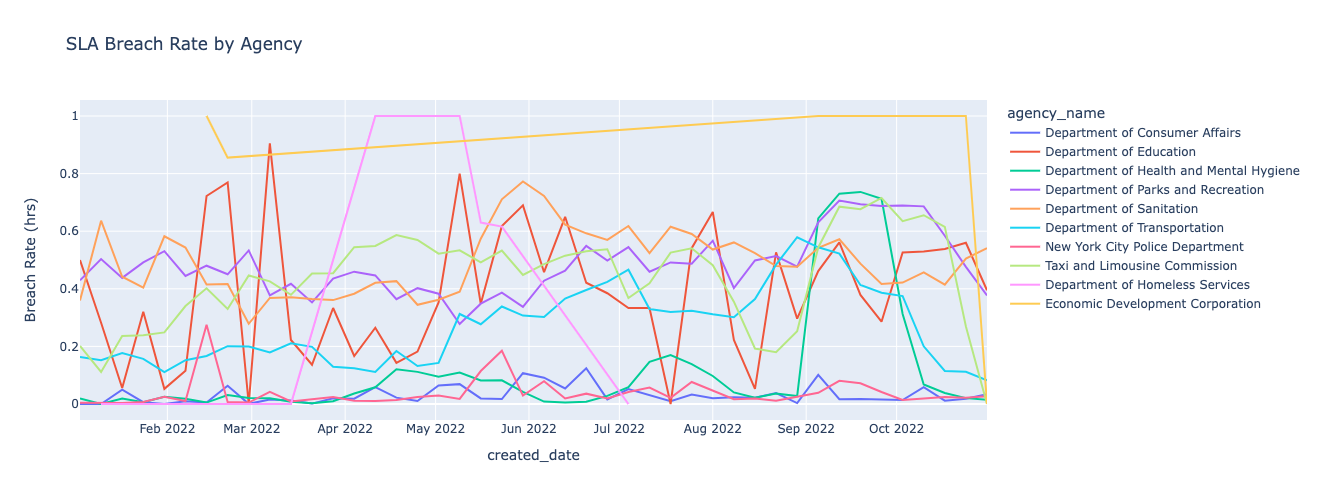

In [34]:
df = (reports[(reports.sla.notna())&(reports.td>0)&(reports.td <= reports.td.quantile(.90))]\
                          .groupby([pd.Grouper(key='created_date', freq='W-MON'), 'agency_name'])\
                          .agg({'breached':lambda g: g.sum() / g.count(),
                                'unique_key':'count'})).reset_index()
px.line(df, x='created_date', y='breached', color='agency_name', hover_data=['unique_key'],
        labels={'breached':'Breach Rate (hrs)', 'unique_key':"Volume"},
        title='SLA Breach Rate by Agency', height=500)

There are many ways in which this analysis can be brought further:
1. Agency backlog
2. Topic modeling / clustering with complaint types and descriptors
3. SLA / TTR heatmap aggregation on ArcGIS
4. Spatiotemporal analysis